Name: Saleh Abdallah

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Data Collection

In [20]:
# Historical Sstocks dataset
df_info = pd.read_csv('historical_stocks.csv')
df_info.head()

,ticker,exchange,name,sector,industry
0,PIH,NASDAQ,"1347 PROPERTY INSURANCE HOLDINGS, INC.",FINANCE,PROPERTY-CASUALTY INSURERS
1,PIHPP,NASDAQ,"1347 PROPERTY INSURANCE HOLDINGS, INC.",FINANCE,PROPERTY-CASUALTY INSURERS
2,TURN,NASDAQ,180 DEGREE CAPITAL CORP.,FINANCE,FINANCE/INVESTORS SERVICES
3,FLWS,NASDAQ,"1-800 FLOWERS.COM, INC.",CONSUMER SERVICES,OTHER SPECIALTY STORES
4,FCCY,NASDAQ,1ST CONSTITUTION BANCORP (NJ),FINANCE,SAVINGS INSTITUTIONS


In [21]:
df_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6460 entries, 0 to 6459
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ticker    6460 non-null   object
 1   exchange  6460 non-null   object
 2   name      6460 non-null   object
 3   sector    5020 non-null   object
 4   industry  5020 non-null   object
dtypes: object(5)
memory usage: 252.5+ KB


In [22]:
# Historical Sstock Prices dataset
df_prices = pd.read_csv('historical_stock_prices.csv')
df_prices.head()

,ticker,open,close,adj_close,low,high,volume,date
0,AHH,11.50,11.58,8.493155,11.25,11.68,4633900,2013-05-08
1,AHH,11.66,11.55,8.471151,11.50,11.66,275800,2013-05-09
2,AHH,11.55,11.60,8.507822,11.50,11.60,277100,2013-05-10
3,AHH,11.63,11.65,8.544494,11.55,11.65,147400,2013-05-13
4,AHH,11.60,11.53,8.456484,11.50,11.60,184100,2013-05-14


In [23]:
df_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20973889 entries, 0 to 20973888
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   ticker     object 
 1   open       float64
 2   close      float64
 3   adj_close  float64
 4   low        float64
 5   high       float64
 6   volume     int64  
 7   date       object 
dtypes: float64(5), int64(1), object(2)
memory usage: 1.3+ GB


Data Cleaning

In [24]:
# Check missing values in df_info
df_info.isnull().sum()

ticker         0
exchange       0
name           0
sector      1440
industry    1440
dtype: int64

In [25]:
# Handle missing values in df_info
df_info.dropna(subset=['sector', 'industry'], inplace=True)
print(f'Total null values in df_info is:', df_info.isnull().sum().sum())

Total null values in df_info is: 0


In [26]:
# Check missing values in df_prices
df_prices.isnull().sum()

ticker       0
open         0
close        0
adj_close    0
low          0
high         0
volume       0
date         0
dtype: int64

In [27]:
# Check duplicates in df_info
df_info.duplicated().sum()

0

In [28]:
# Check duplicates in df_prices
df_prices.duplicated().sum()

0

In [29]:
# Convert date to datetime formet and set to index
df_prices['date'] = pd.to_datetime(df_prices['date'], errors='coerce')
df_prices.set_index('date', inplace=True)
df_prices.head()
# # Feature engineering: add new columns Year & Month
# fifa['Year'] = fifa['Joined'].dt.year
# fifa['Month'] = fifa['Joined'].dt.month

,ticker,open,close,adj_close,low,high,volume
date,,,,,,,
2013-05-08,AHH,11.50,11.58,8.493155,11.25,11.68,4633900
2013-05-09,AHH,11.66,11.55,8.471151,11.50,11.66,275800
2013-05-10,AHH,11.55,11.60,8.507822,11.50,11.60,277100
2013-05-13,AHH,11.63,11.65,8.544494,11.55,11.65,147400
2013-05-14,AHH,11.60,11.53,8.456484,11.50,11.60,184100


Data Segmentation by Decade

In [33]:
# Create a decade column
df_prices['decade'] = (df_prices.index.year // 10) * 10
df_prices.head()

,ticker,open,close,adj_close,low,high,volume,decade
date,,,,,,,,
2013-05-08,AHH,11.50,11.58,8.493155,11.25,11.68,4633900,2010
2013-05-09,AHH,11.66,11.55,8.471151,11.50,11.66,275800,2010
2013-05-10,AHH,11.55,11.60,8.507822,11.50,11.60,277100,2010
2013-05-13,AHH,11.63,11.65,8.544494,11.55,11.65,147400,2010
2013-05-14,AHH,11.60,11.53,8.456484,11.50,11.60,184100,2010


In [97]:
# Create decades dictionary using dictionary comprehension
decades_list = {decade: data for decade, data in df_prices.groupby('decade')}
print("Decades:", decades_list.keys())

Decades: dict_keys([1970, 1980, 1990, 2000, 2010])


Exploratory Data Analysis by Decade

In [ ]:
# Merge df_info and df_prices
df = pd.merge(df_info, df_prices.reset_index(), how='inner', on='ticker')
# Set the date back as index
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df.head()

,ticker,exchange,name,sector,industry,open,close,adj_close,low,high,volume,decade
date,,,,,,,,,,,,
2014-04-01,PIH,NASDAQ,"1347 PROPERTY INSURANCE HOLDINGS, INC.",FINANCE,PROPERTY-CASUALTY INSURERS,8.00,7.95,7.95,7.90,8.50,642900,2010
2014-04-02,PIH,NASDAQ,"1347 PROPERTY INSURANCE HOLDINGS, INC.",FINANCE,PROPERTY-CASUALTY INSURERS,7.94,8.16,8.16,7.90,8.29,228400,2010
2014-04-03,PIH,NASDAQ,"1347 PROPERTY INSURANCE HOLDINGS, INC.",FINANCE,PROPERTY-CASUALTY INSURERS,8.29,8.39,8.39,8.05,8.40,105000,2010
2014-04-04,PIH,NASDAQ,"1347 PROPERTY INSURANCE HOLDINGS, INC.",FINANCE,PROPERTY-CASUALTY INSURERS,8.50,8.69,8.69,8.32,8.70,113600,2010
2014-04-07,PIH,NASDAQ,"1347 PROPERTY INSURANCE HOLDINGS, INC.",FINANCE,PROPERTY-CASUALTY INSURERS,9.00,8.94,8.94,8.55,9.00,60500,2010


In [ ]:
# Decade summary statistics
summary_stats = df.groupby('decade')[['open', 'high', 'low', 'close', 'volume']].agg(['mean', 'median', 'std']).round(2)
summary_stats


open                    high                     low         \
          mean median      std    mean median      std    mean median   
decade                                                                  
1970     12.44   2.76    47.15   12.58   2.81    47.65   12.31   2.74   
1980     16.74   4.77   584.29   17.03   4.85   594.25   16.49   4.72   
1990     48.11  10.08  1458.07   49.84  10.25  1535.13   46.51   9.95   
2000    135.10  17.55  4762.23  138.85  17.88  4994.03  131.61  17.24   
2010     66.84  21.24  1636.79   68.47  21.56  1785.62   65.36  20.91   

                  close                      volume                        
            std    mean median      std        mean    median         std  
decade                                                                     
1970      46.68   12.44   2.76    47.15   730385.53  192000.0  1381559.90  
1980     573.29   16.75   4.77   586.31   868970.32   70400.0  4595848.76  
1990    1393.32   48.13  10.09  1458.56   942312.22   73800.0  6108093.56  
2000    4585.12  135.26  17.56  4787.87  1425384.36  172700.0  7023196.35  
2010    1572.74   66.84  21.24  1673.74  1311189.67  225500.0  5344330.16

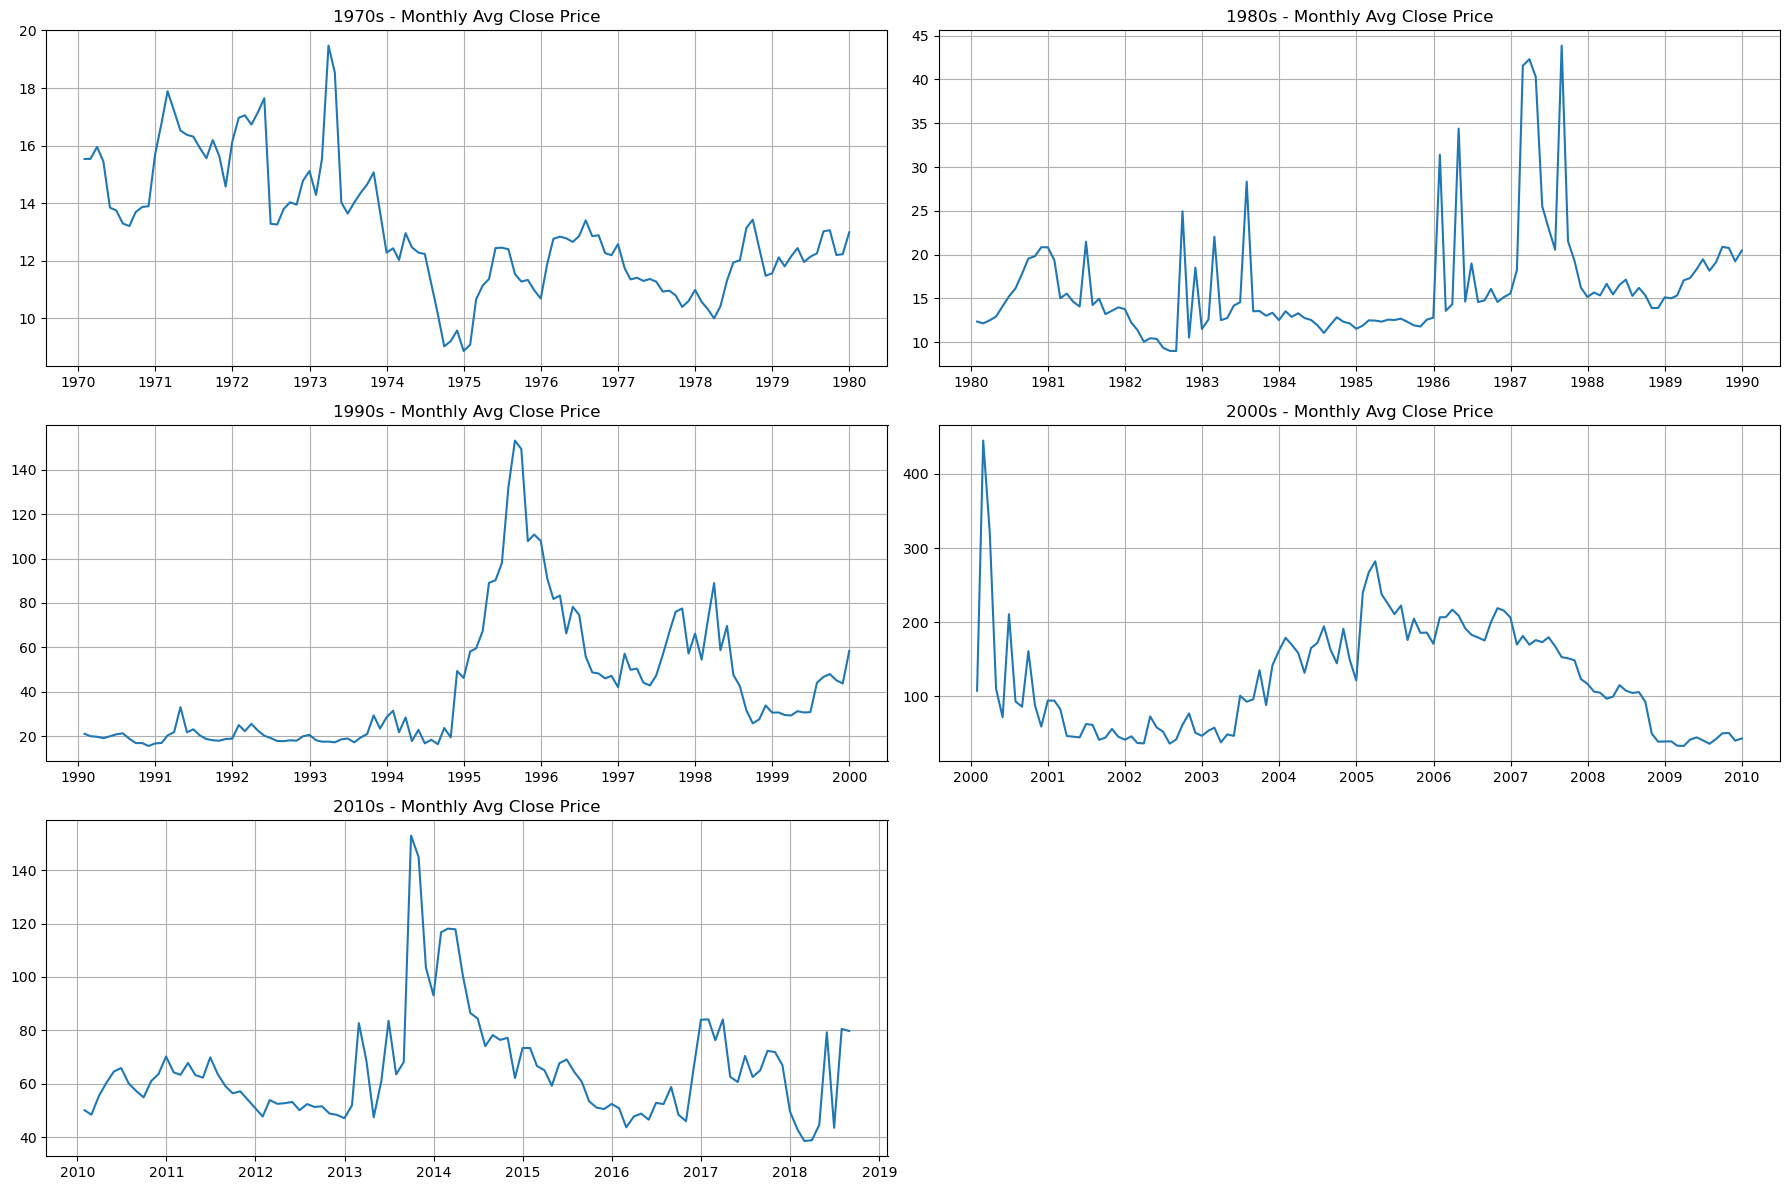

In [ ]:
# Data Visualizations
# Time series - Monthly Clode Price
plt.figure(figsize=(18, 12))
for i, (decade, data) in enumerate(decades_list.items()):
    monthly_avg = data.resample('M')['close'].mean()
    plt.subplot(3, 2, i+1)
    plt.plot(monthly_avg)
    plt.title(f'{decade}s - Monthly Avg Close Price')
    plt.xlabel('')
    plt.ylabel('')
    plt.grid(True)
    plt.tight_layout()
plt.show()

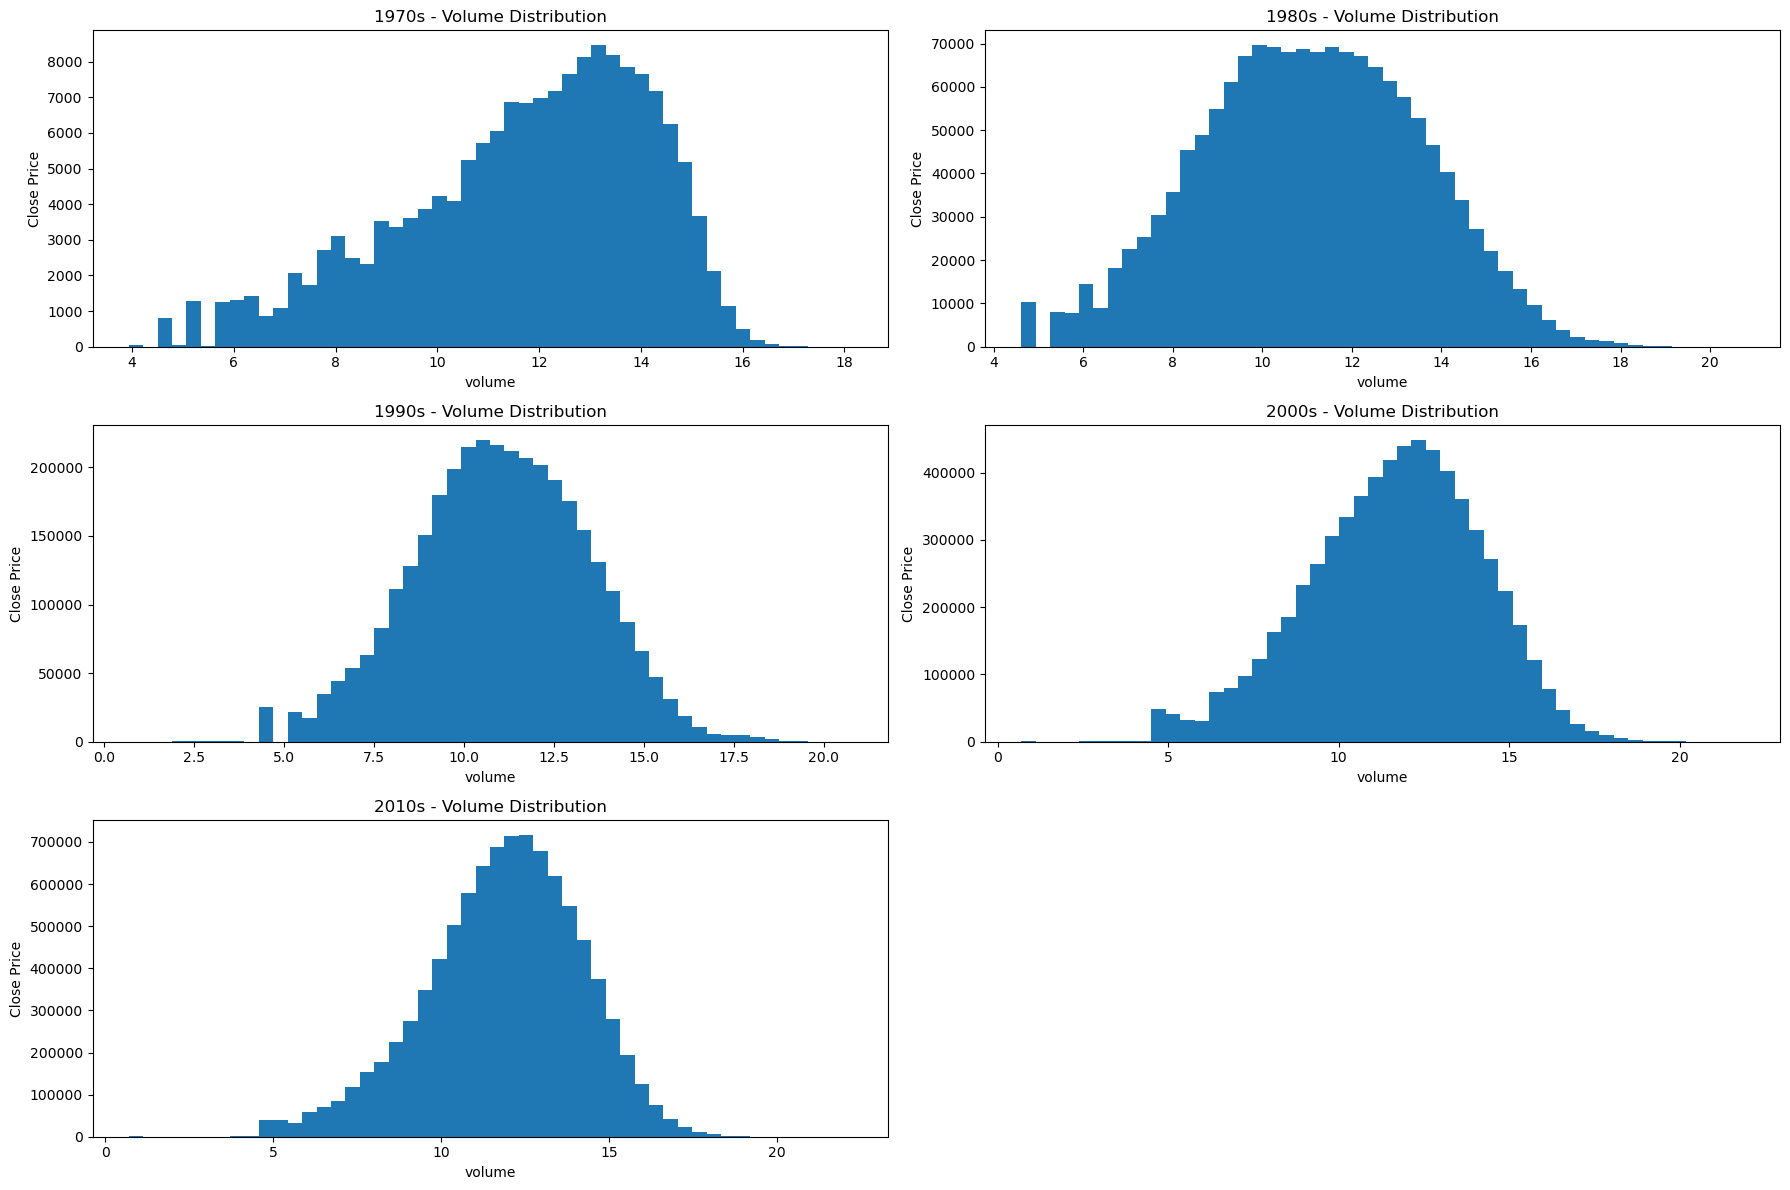

In [ ]:
# Histograms - Volume Distribution
plt.figure(figsize=(18, 12))
for i, (decade, data) in enumerate(decades_list.items()):
    plt.subplot(3, 2, i+1)
    plt.hist(np.log1p(data['volume']), bins=50)
    plt.title(f'{decade}s - Volume Distribution')
    plt.xlabel('volume')
    plt.ylabel('Close Price')
    plt.tight_layout()
plt.show()

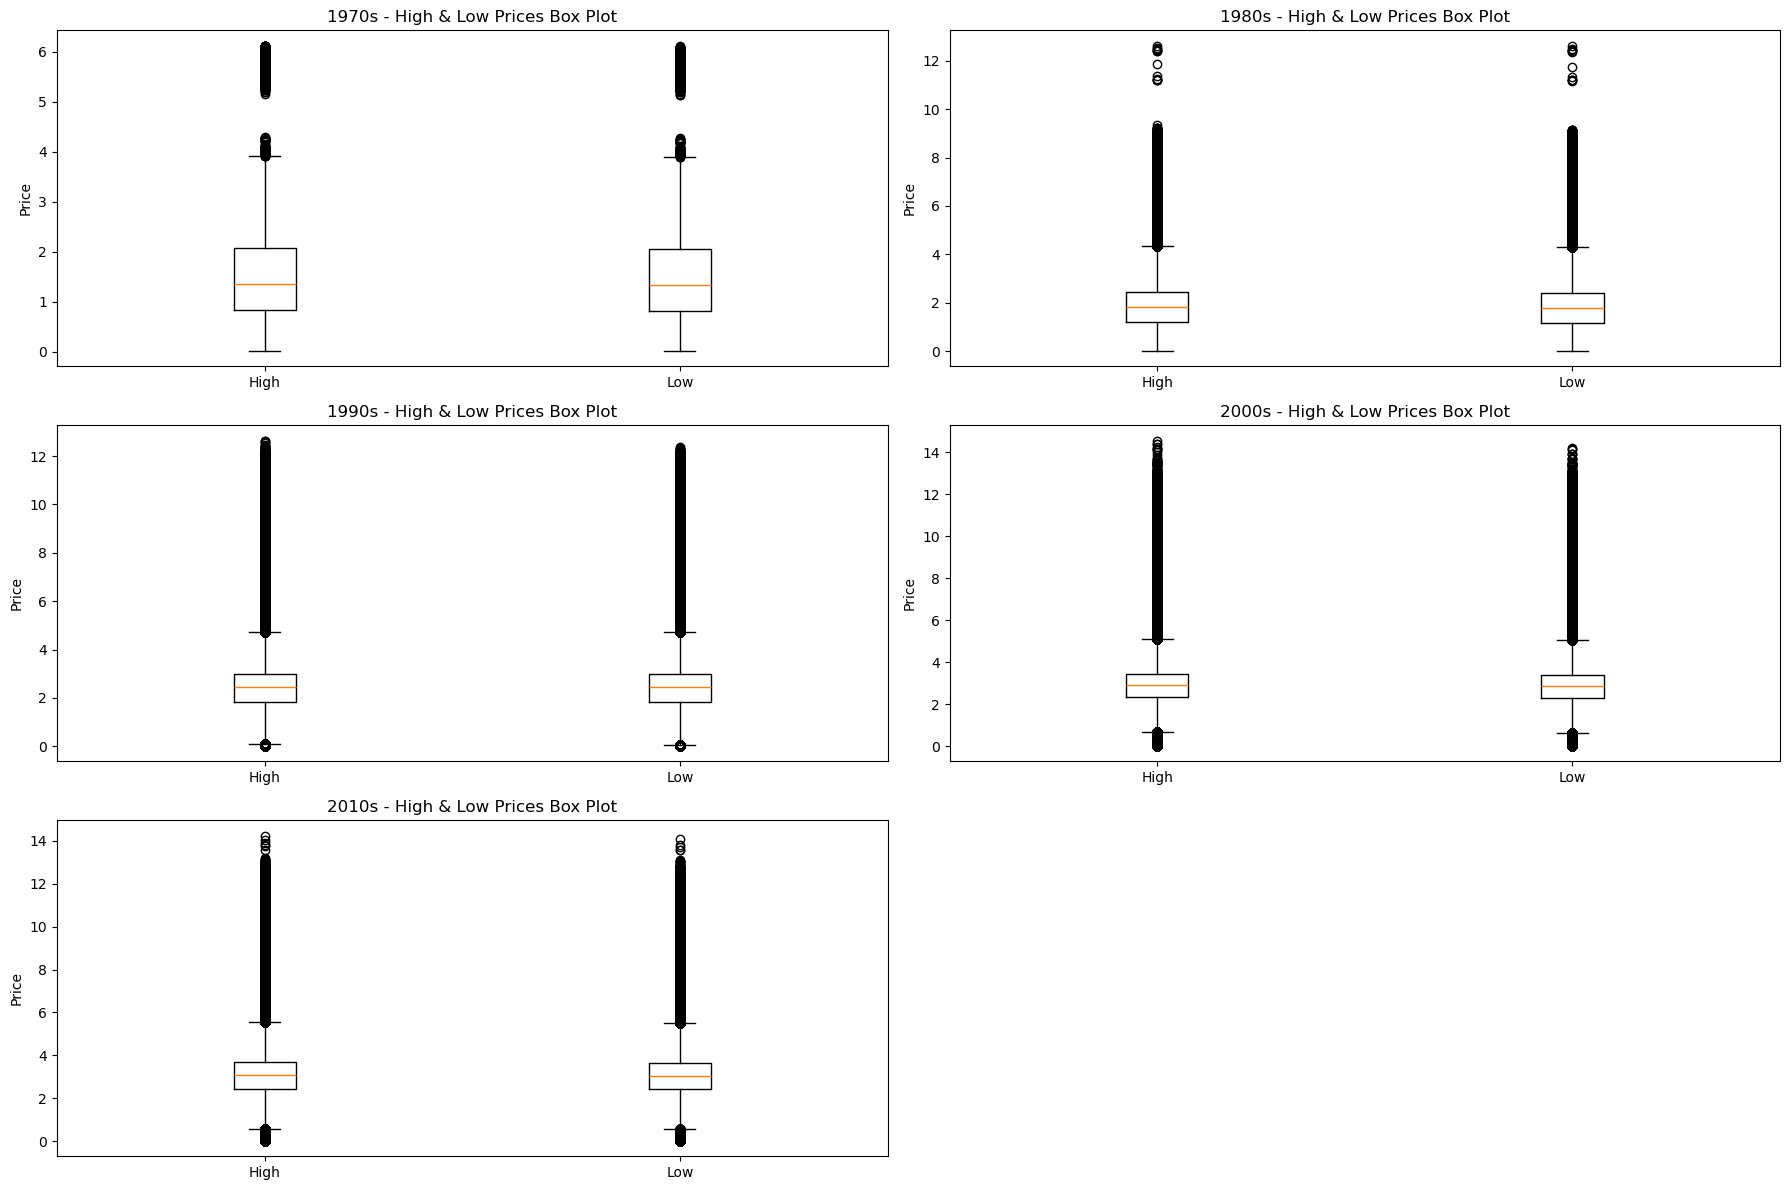

In [ ]:
# Box Plots - High & Low Prices
plt.figure(figsize=(18, 12))
for i, (decade, data) in enumerate(decades_list.items()):
    plt.subplot(3, 2, i+1)
    plt.boxplot([np.log1p(data['high']), np.log1p(data['low'])], labels=['High', 'Low'])
    plt.title(f'{decade}s - High & Low Prices Box Plot')
    plt.ylabel('Price')
    plt.tight_layout()
plt.show()

Comparative Analysis

1. Summary Statistics:

    * Mean values of Open, High, Low, and Close prices increased from the 1970s to the 2000s, then dropped in the 2010s. Similarly the mean volume increased from 730k in 1970s to 1.3M in 2010s.

2. Monthly Avg Cloase Price (Time Series):

    * Stock prices went up overall across decades, especially in the last three decades.


3. Volume Distributions (Histograms):

    * Average trading volumes increased over decades from 730k in 1970s to 1.3M in 2010s.



4. High/Low Proces (Box Plots):

    * Clear presence of outliers in High and Low prices, especially during 2000s and 2010s. 

Documentation and Reporting

Stock Market Trends Over Five Decades - Key Findings:

* Stock prices increased over time, reached their highest in the 2000s, then became more stable.
* Trading volume increased gradually over the decades possibly due to economic growth and the rise of online trading.